In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from geospatial import *

Main Function

In [16]:
# Function: Extract coordinates value from pointgroup
# Input: a list of point, each point is of the point class from geospatial.py.
# Output: a numpy array list of coordinates.
def coordinate_list(pointgroup):
    n = len(pointgroup)
    valuelist = []
    for i in range(0, n):
        valuelist.append([pointgroup[i].x, pointgroup[i].y])
    return valuelist

# Function: calculate distance between each pair of points from two point group
# Input: a list of points, each point is of the point class from geospatial.py.
# Output: a matrix of distance value between each pair of points from the two point group.
def distance_matrix_from_two_pointgroup(pointgroup1, pointgroup2):
    n = len(pointgroup1)
    m = len(pointgroup2)
    distance_matrix = np.zeros((n, m))
    for i in range(0, n):
        for j in range(0, m):
            distance_matrix[i, j] = pointgroup1[i].distEuclidean(pointgroup2[j])
    return distance_matrix

# Function: Calculate the dtw value(dynamic time warping distance)
# Input: two list of points, each point is of the point class from geospatial.py.
# Output 1: d[-1,-1], which is the dtw distance value, a float.
# Output 2: d, the cumulative distance matrix
def dtw(pointgroup1, pointgroup2):
    d_matrix = distance_matrix_from_two_pointgroup(pointgroup1, pointgroup2)
    d = np.zeros(d_matrix.shape)
    d[0, 0] = d_matrix[0, 0]
    n, m = d_matrix.shape
    for i in range(1, n):
        d[i, 0] = d[i-1, 0] + d_matrix[i, 0]
    for j in range(1, m):
        d[0, j] = d[0, j-1] + d_matrix[0, j]
    for i in range(1, n):
        for j in range(1, m):
            d[i, j] = d_matrix[i, j] + min((d[i-1, j], d[i, j-1], d[i-1, j-1]))
    # print(f"dtw value: {d[-1, -1]}")
    # print(f"dtw distance matrix: {d}")
    return d[-1, -1], d

# Function: Calculate the optimal dtw path of a given dtw cumulative distance matrix
# Input: a matrix, specifically a dtw cumulative distance matrix (result d of dtw function).
# Output: a ndarray, the shortest/optimal path of the distance matrix from the first cell to the last one.
def dtw_path(d):
    path = []
    i, j = d.shape
    i = i - 1
    j = j - 1
    path.append((i, j))
    while i > 0 or j > 0:
        if i == 0:
            j = j - 1
        elif j == 0:
            i = i - 1
        else:
            temp_step = min([d[i-1, j], d[i, j-1], d[i-1, j-1]])
            if d[i-1, j] == temp_step:
                i = i - 1
            elif d[i, j-1] == temp_step:
                j = j - 1
            else:
                i = i - 1
                j = j - 1
        path.append((i, j))
    path = np.array(path)
    # reverse the order of path, such that it starts with [0, 0]
    return path[::-1]

Demo

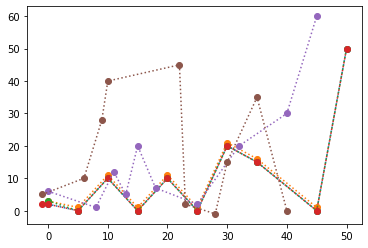

In [17]:
# Build sample data for curves
data1 = [Point(0,2), Point(5,0), Point(10,10), Point(15,0), Point(20,10), Point(25, 0), Point(30, 20), Point(35, 15), Point(45, 0), Point(50, 50)]
data2 = [Point(0,3), Point(5,1), Point(10,11), Point(15,1), Point(20,11), Point(25, 1), Point(30, 21), Point(35, 16), Point(45, 1)]
data3 = [Point(0,3), Point(5,0), Point(10,10), Point(15,0), Point(20,10), Point(25, 0), Point(30, 20), Point(35, 15), Point(45, 0), Point(50, 50)]
data4 = [Point(-1,2),Point(0,2), Point(5,0), Point(10,10), Point(15,0), Point(20,10), Point(25, 0), Point(30, 20), Point(35, 15), Point(45, 0), Point(50, 50)]
data5 = [Point(0,6), Point(8,1), Point(11,12), Point(13,5), Point(15,20), Point(18, 7), Point(25, 2), Point(32, 20), Point(40, 30), Point(45, 60)]
data6 = [Point(-1,5), Point(6,10), Point(9,28), Point(10,40), Point(22,45), Point(23, 2), Point(28, -1), Point(30, 15), Point(35, 35), Point(40, 0)]

# Visualization of point data group
x1 = [i.x for i in data1]
y1 = [i.y for i in data1]
plt.plot(x1, y1, linestyle="dotted", marker="o")

x2 = [i.x for i in data2]
y2 = [i.y for i in data2]
plt.plot(x2, y2, linestyle="dotted", marker="o")

x3 = [i.x for i in data3]
y3 = [i.y for i in data3]
plt.plot(x3, y3, linestyle="dotted", marker="o")

x4 = [i.x for i in data4]
y4 = [i.y for i in data4]
plt.plot(x4, y4, linestyle="dotted", marker="o")

x5 = [i.x for i in data5]
y5 = [i.y for i in data5]
plt.plot(x5, y5, linestyle="dotted", marker="o")

x6 = [i.x for i in data6]
y6 = [i.y for i in data6]
plt.plot(x6, y6, linestyle="dotted", marker="o")


dtw value: 58.25444142409901
dtw cumulative matrix: [[  1.           6.09901951  19.55264356  34.58593994  56.51765214
   81.53764414 117.04820595 154.7443596  199.75546934]
 [  6.83095189   2.          14.08304597  24.13292159  42.73399683
   62.75898123  95.40863666 129.40863666 169.42113471]
 [ 19.03750751  12.29563014   3.          13.29563014  23.34550576
   40.83836145  63.66378587  89.37370613 125.51232813]
 [ 34.33456605  22.34550576  15.08304597   4.          16.08304597
   26.13292159  51.9398974   77.55239435 107.56905639]
 [ 55.52418615  39.83836145  25.13292159  14.29563014   5.
   15.29563014  30.16169889  46.31719331  72.88785382]
 [ 80.70354278  59.86334584  43.73399683  24.34550576  17.08304597
    6.          27.58703314  46.45499541  66.3421777 ]
 [115.18542207  91.26398278  65.66570903  48.55294264  30.53667002
   25.6468827    7.          13.40312424  37.61056111]
 [152.18542207 124.36987349  90.98368683  72.96605387  46.06084472
   42.85153324  14.81024968   8.   

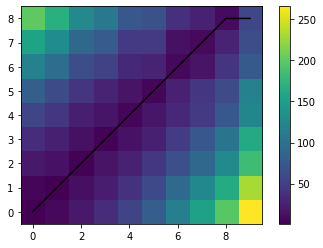

In [18]:
r,d = dtw(data1, data2)
print(f"dtw value: {r}")
print(f"dtw cumulative matrix: {d}")
print(f"dtw optimal path: {dtw_path(d)}")
path = dtw_path(d)
plt.figure()
plt.imshow(d.T, origin='lower')
plt.plot(path[:, 0], path[:, 1], '-k')
plt.colorbar()
plt.show()

dtw value: 1.0
dtw cumulative matrix: [[  1.           6.38516481  19.19141328  34.32415923  55.86481846
   80.94469087 115.93040224 153.26671164 198.31113416 267.62202797]
 [  6.83095189   1.          12.18033989  22.18033989  40.20809626
   60.20809626  92.22371745 125.76473711 165.76473711 233.03285735]
 [ 19.03750751  12.18033989   1.          12.18033989  22.18033989
   40.20809626  62.56877604  88.06387361 124.46442305 181.03296555]
 [ 34.33456605  22.18033989  12.18033989   1.          12.18033989
   22.18033989  47.18033989  72.18033989 102.18033989 163.21311797]
 [ 55.52418615  40.20809626  22.18033989  12.18033989   1.
   12.18033989  26.32247551  42.13386381  69.05968785 119.05968785]
 [ 80.70354278  60.20809626  40.20809626  22.18033989  12.18033989
    1.          21.61552813  39.64328451  59.64328451 115.54498394]
 [115.18542207  92.22371745  62.56877604  47.18033989  26.32247551
   21.61552813   1.           8.07106781  33.07106781  69.12658057]
 [152.18542207 125.764737

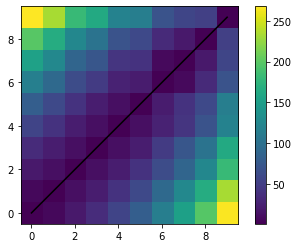

In [19]:
r,d = dtw(data1, data3)
print(f"dtw value: {r}")
print(f"dtw cumulative matrix: {d}")
print(f"dtw optimal path: {dtw_path(d)}")
path = dtw_path(d)
plt.figure()
plt.imshow(d.T, origin='lower')
plt.plot(path[:, 0], path[:, 1], '-k')
plt.colorbar()
plt.show()

dtw value: 1.0
dtw cumulative matrix: [[  1.           1.           6.38516481  19.19141328  34.32415923
   55.86481846  80.94469087 115.93040224 153.26671164 198.31113416
  267.62202797]
 [  7.32455532   6.38516481   1.          12.18033989  22.18033989
   40.20809626  60.20809626  92.22371745 125.76473711 165.76473711
  233.03285735]
 [ 20.92602583  19.19141328  12.18033989   1.          12.18033989
   22.18033989  40.20809626  62.56877604  88.06387361 124.46442305
  181.03296555]
 [ 37.05054133  34.32415923  22.18033989  12.18033989   1.
   12.18033989  22.18033989  47.18033989  72.18033989 102.18033989
  163.21311797]
 [ 59.52274638  55.86481846  40.20809626  22.18033989  12.18033989
    1.          12.18033989  26.32247551  42.13386381  69.05968785
  119.05968785]
 [ 85.599556    80.94469087  60.20809626  40.20809626  22.18033989
   12.18033989   1.          21.61552813  39.64328451  59.64328451
  115.54498394]
 [121.44645266 115.93040224  92.22371745  62.56877604  47.18033989
   

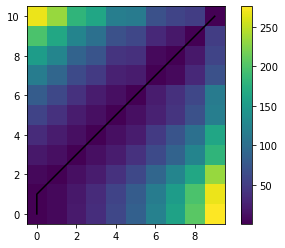

In [20]:
r,d = dtw(data1, data4)
print(f"dtw value: {r}")
print(f"dtw cumulative matrix: {d}")
print(f"dtw optimal path: {dtw_path(d)}")
path = dtw_path(d)
plt.figure()
plt.imshow(d.T, origin='lower')
plt.plot(path[:, 0], path[:, 1], '-k')
plt.colorbar()
plt.show()

dtw value: 80.99450604160096
dtw cumulative matrix: [[  4.          12.06225775  26.9283265   40.26999056  63.70073959
   82.38228128 107.38228128 144.09740078 192.92362324 266.33343185]
 [ 11.81024968   7.16227766  20.57868553  30.01266666  52.37334643
   67.13816949  87.23792073 120.83851597 166.93623825 239.04726376]
 [ 22.58057929  16.38182212   9.39834564  15.22929753  26.40963742
   34.95364117  51.95364117  76.11973311 112.17524587 173.20802395]
 [ 38.73607371  23.45288993  22.04745628  14.78351044  34.78351044
   34.02541053  44.22344955  70.47225905 109.52350743 176.60554675]
 [ 59.13215177  38.45288993  31.26700074  23.38583571  25.96385033
   29.56940161  39.00338274  54.62388209  82.90815334 138.80985278]
 [ 84.84207203  55.4822763   49.70608965  36.38583571  45.74651549
   35.86334527  31.56940161  52.75902171  86.30004137 146.15370654]
 [117.94796274  84.55116     70.32161778  59.05740381  51.38583571
   53.55515128  50.2509433   33.56940161  47.71153723  90.43155596]
 [1

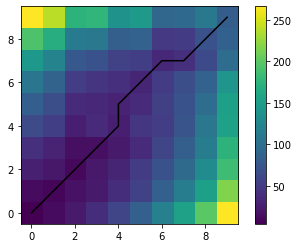

In [21]:
r,d = dtw(data1, data5)
print(f"dtw value: {r}")
print(f"dtw cumulative matrix: {d}")
print(f"dtw optimal path: {dtw_path(d)}")
path = dtw_path(d)
plt.figure()
plt.imshow(d.T, origin='lower')
plt.plot(path[:, 0], path[:, 1], '-k')
plt.colorbar()
plt.show()

dtw value: 193.58919460686056
dtw cumulative matrix: [[  3.16227766  13.16227766  40.67591064  79.96967605 128.27081476
  151.27081476 179.43107044 212.12663589 260.23068977 300.28065856]
 [ 10.97252734  13.21215328  41.44654891  80.98719939 128.07372994
  146.18450021 169.20622908 198.36098855 244.45871084 279.45871084]
 [ 23.05557331  14.97252734  31.23990966  61.23990966  98.23990966
  113.50424718 134.59927029 155.21479842 190.57013748 222.19291408]
 [ 39.81862792  28.42615138  43.60816946  71.5511984  106.78109981
  106.48612091 119.52452572 140.73772916 181.0490179  206.0490179 ]
 [ 61.40566107  42.42615138  49.52117449  75.23094606 106.60829469
  115.03012466 120.08759142 130.70486561 159.85962508 182.22030486]
 [ 87.88206566  63.89706194  74.67518238  92.24119322 120.3308352
  109.43672181 112.59899947 128.41038777 164.81093722 174.85962508]
 [122.32041637  89.89706194  86.36926699 102.95945362 118.49000272
  128.74992973 130.53174492 117.59899947 133.41038777 155.77106755]
 [1

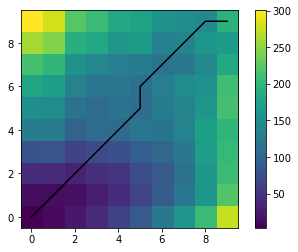

In [22]:
r,d = dtw(data1, data6)
print(f"dtw value: {r}")
print(f"dtw cumulative matrix: {d}")
print(f"dtw optimal path: {dtw_path(d)}")
path = dtw_path(d)
plt.figure()
plt.imshow(d.T, origin='lower')
plt.plot(path[:, 0], path[:, 1], '-k')
plt.colorbar()
plt.show()

Based on the results, the dtw values between data1 and data3/data4 are the smallest. We could say data3 and data4 are more similar to data1 than other sample curve data.